## Problem 2

You are given the “Abalone” dataset found in data/abalone.csv, which contains physical measurements of abalone (a type of sea shells) and the age of the abalone measured in rings (the number of rings in the shell) https://en.wikipedia.org/wiki/Abalone. Your task is to train a linear regression model to predict the age (Rings) of an abalone based on its physical measurements. 

To evaluate your model, you will split the dataset into a training set and a testing set. You will use the training set to train your model, and the testing set to evaluate its performance.


1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out what are the features and the target and fill in the answer in the correct cell below. [2p]

In [82]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv
import pandas as pd
problem2_df = pd.read_csv("data/abalone.csv")
problem2_df


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [83]:
# Part 1
# Fill in the features as a list of strings of the names of the columns

problem2_features = list(problem2_df.columns)
print(f"problem2_features: {problem2_features}")
# Fill in the target as a string with the correct column name

problem2_target = "Rings"

problem2_features: ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']


2. Split the data into train and test. [2p]

In [84]:
 # Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
from sklearn.model_selection import train_test_split
X = problem2_df[problem2_features[:-1]]
y = problem2_df[problem2_target]

# One-hot encode Sex feature
X["Male"] = (X["Sex"] == "M").astype(int)
X["Female"] = (X["Sex"] == "F").astype(int)
X["Infant"] = (X["Sex"] == "I").astype(int)
X = X.drop(columns="Sex")

problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(problem2_X_train)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
4038   0.550     0.445   0.125        0.6720          0.2880          0.1365   
1272   0.475     0.355   0.100        0.5035          0.2535          0.0910   
3384   0.305     0.225   0.070        0.1485          0.0585          0.0335   
3160   0.275     0.200   0.065        0.1165          0.0565          0.0130   
3894   0.495     0.380   0.135        0.6295          0.2630          0.1425   
...      ...       ...     ...           ...             ...             ...   
3444   0.490     0.400   0.115        0.5690          0.2560          0.1325   
466    0.670     0.550   0.190        1.3905          0.5425          0.3035   
3092   0.510     0.395   0.125        0.5805          0.2440          0.1335   
3772   0.575     0.465   0.120        1.0535          0.5160          0.2185   
860    0.595     0.475   0.160        1.1405          0.5470          0.2310   

      Shell weight  Male  Female  Infan

3. Train the model. [1p]

In [85]:
# Part 3

# Include the necessary imports
from sklearn.linear_model import LinearRegression
# Initialize your linear regression model
problem2_model = LinearRegression()

# Train your model on the training data
problem2_model.fit(problem2_X_train, problem2_y_train)

LinearRegression()

4. On the test set, evaluate the model by computing the mean absolute error and plot the empirical distribution function of the residual with confidence bands (i.e. using the DKW inequality and 95% confidence). Hint: you can use the function plotEDF,makeEDF combo from Utils.py that we have used numerous times, which also contains the option to have confidence bands. [3p]

In [86]:
# Part 4
# Evaluate the model by computing the mean absolute error
import numpy as np
from sklearn.metrics import mean_absolute_error
y_pred = problem2_model.predict(problem2_X_test)


problem2_mae = mean_absolute_error(problem2_y_test, y_pred)
problem2_mae

1.5931067816608344

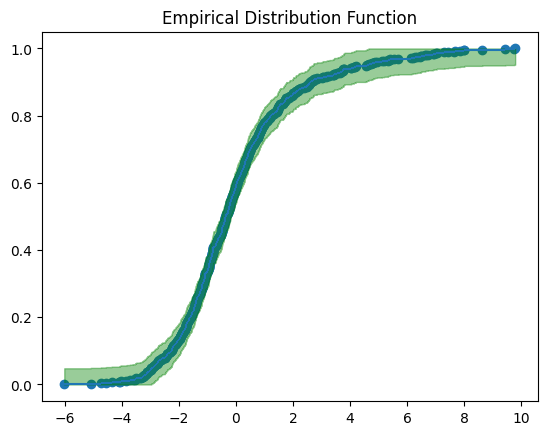

In [87]:
# Part 4

# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 95% confidence in this cell

from Utils import makeEDF,plotEDF
residuals = problem2_y_test -y_pred 
edf = makeEDF(residuals)
plotEDF(edf, confidence_band=True)

5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is the true value, do this over the test set. [2p]

-3.00876822505868
3
1 2


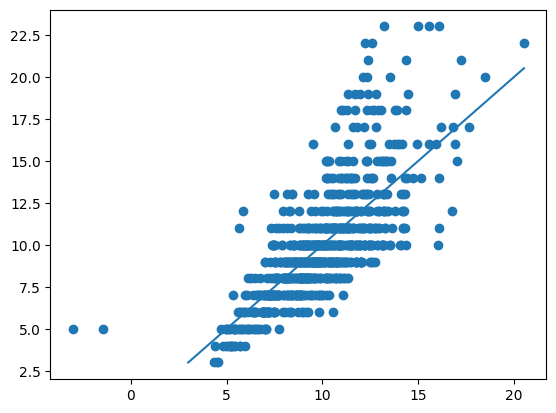

In [103]:
# Part 5
# Write the code below to produce the scatter plot for part 5
import matplotlib.pyplot as plt

plt.scatter(y_pred, problem2_y_test)
start = max(min(y_pred), min(problem2_y_test))
stop = min(max(y_pred), max(problem2_y_test))
diagonal = np.linspace(start, stop, 2)
plt.plot(diagonal, diagonal)
print(min(y_pred))
print(min(problem2_y_test))
print(1,2)

6. Reason about the performance, for instance, is the value of the mean absolute error good/bad and what do you think about the scatter plot in point 5? [3p]

**Mean Absolute Error (MAE):**
- The MAE provides an average of the absolute differences between the predicted and true values of the abalone's age. If the MAE is small (relative to the range of the target variable, "Rings"), it indicates that the model is performing well.
- For example, if the target variable ranges from 1 to 30 and the MAE is 2, this might be acceptable, as the prediction is off by an average of two rings. However, if the MAE is much larger, the model's predictions are less reliable.

**Scatter Plot (Predicted vs. True Values):**

- Ideally, the points on the scatter plot should align closely with the diagonal line $y=x$. This would indicate that the model’s predictions are accurate.
- If there is significant scatter or a consistent deviation (e.g., overprediction or underprediction for specific ranges), it might suggest issues such as:
  - A non-linear relationship between features and the target.
  - Insufficient feature representation (e.g., important variables are missing).
  - Overfitting or underfitting of the model.

**Potential Observations:**
- If the scatter plot shows that the model performs poorly for certain age ranges (e.g., younger or older abalones), it might indicate that the data distribution is imbalanced or that these age ranges are harder to predict due to higher variance.
- If there is no clear pattern, and the scatter plot looks random, it may suggest the model lacks predictive power.

**Overall Assessment:**

- If the MAE is relatively high and the scatter plot shows significant deviations from the diagonal, a linear regression model might not be the best choice for this problem. Non-linear models (e.g., decision trees, random forests, or neural networks) could better capture complex relationships.
- However, if the scatter plot aligns well with the diagonal and the MAE is small, the linear regression model performs adequately, and further fine-tuning or feature engineering may yield marginal improvements.

## Problem 3

A healthcare organization is interested in understanding the relationship between the number of
visits to the doctors office and certain patient characteristics. They have collected data on the
number of visits for a sample of patients and have included the following variables
- ofp : number of physician office visits
- ofnp : number of nonphysician office visits
- opp : number of physician outpatient visits
- opnp : number of nonphysician outpatient visits
- emr : number of emergency room visits
- hosp : number of hospitalizations
- exclhlth : the person is of excellent health (self-perceived)
- poorhealth : the person is of poor health (self-perceived)
- numchron : number of chronic conditions
- adldiff : the person has a condition that limits activities of daily living ?
- noreast : the person is from the north east region
- midwest : the person is from the midwest region
- west : the person is from the west region
- age : age in years (divided by 10)
- male : is the person male ?
- married : is the person married ?
- school : number of years of education
- faminc : family income in 10000$
- employed : is the person employed ?
- privins : is the person covered by private health insurance?
- medicaid : is the person covered by medicaid ?

Decide which patient features are resonable to use to predict the target “number of physician office visits”. Hint: should we really use the “ofnp” etc variables?

Since the target variable is counts, a reasonable loss function is to consider the target variable as
Poisson distributed where the parameter follows $\lambda = \exp(\alpha\cdot x+ \beta)$ where $\alpha$ is a vector (slope) and $\beta$ is a number (intercept). That is, the parameter is the exponential of a linear function. The reason we chose this as our parameter, is that it is always positive which is when the Poisson distribution is defined. To be specific we make the following assumption about our conditional density of $Y \mid X$,

$$
  f_{Y\mid X}(y, x) = \frac{\lambda^ye^{-\lambda}}{y!},\quad \lambda(x) = \exp(\alpha\cdot x + \beta) 
$$

Recall from the lecture notes, (4.2) that in this case we should consider the log-loss (entropy) and that according to (4.2.1 Maximum Likelihood and regression) we can consider the conditional loglikelihood. Follow the steps of Example 1 and Example 2 in section (4.2) to derive the loss that needs to be minimized.

Hint: when taking the log of the conditional density you will find that the term that contains the $y!$ does not depend on $\lambda$ and as such does not depend on $\alpha$, $\beta$, it can thus be discarded. This will be essential due to numerical issues with factorials.

1. Load the file `data/visits_clean.csv` into the pandas dataframe `problem3_df`. Decide what
should be features and target, give motivations for your choices. [3p]

In [115]:
# Part 1

# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv
problem3_df = pd.read_csv("data/visits_clean.csv", sep=" ")
problem3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ofp       4406 non-null   int64  
 1   ofnp      4406 non-null   int64  
 2   opp       4406 non-null   int64  
 3   opnp      4406 non-null   int64  
 4   emr       4406 non-null   int64  
 5   hosp      4406 non-null   int64  
 6   exclhlth  4406 non-null   int64  
 7   poorhlth  4406 non-null   int64  
 8   numchron  4406 non-null   int64  
 9   adldiff   4406 non-null   int64  
 10  noreast   4406 non-null   int64  
 11  midwest   4406 non-null   int64  
 12  west      4406 non-null   int64  
 13  age       4406 non-null   float64
 14  male      4406 non-null   int64  
 15  married   4406 non-null   int64  
 16  school    4406 non-null   int64  
 17  faminc    4406 non-null   float64
 18  employed  4406 non-null   int64  
 19  privins   4406 non-null   int64  
 20  medicaid  4406 non-null   int6

When predicting the target variable, **"number of physician office visits" ($ofp$)**, we should carefully select predictor variables to avoid introducing bias or information leakage. Variables directly related to the target or measuring similar outcomes should not be used as predictors, as they may artificially inflate the model’s performance without offering practical insights.
**What features are reasonable?**

1. **Patient health status:**
   - `numchron`: Number of chronic conditions is highly relevant as chronic illnesses often require more frequent physician visits.
   - `exclhlth`: Self-perceived excellent health may reduce the likelihood of frequent visits.
   - `poorhealth`: Self-perceived poor health increases the likelihood of frequent visits.
   - `adldiff`: A condition limiting activities of daily living may lead to more visits.

2. **Demographics:**
   - `age`: Older individuals are more likely to visit physicians.
   - `male`: Gender might impact health-seeking behavior.
   - `married`: Marital status might influence access to or need for medical care.

3. **Socioeconomic factors:**
   - `school`: Education may impact health literacy and access to healthcare.
   - `faminc`: Income level can affect the ability to afford healthcare.
   - `employed`: Employment status may indicate access to employer-provided insurance and income stability.
   - `privins`: Private health insurance coverage may increase access to physicians.
   - `medicaid`: Medicaid coverage may impact healthcare utilization.

4. **Geographic factors:**
   - `noreast`, `midwest`, `west`: Regional differences can affect healthcare access, availability, and cultural attitudes toward health-seeking behavior.

---

### Features to Exclude:
1. **Directly related outcomes (introduce information leakage):**
   - `ofnp`: Number of nonphysician office visits is highly correlated with `ofp` and not independent.
   - `opp`: Number of physician outpatient visits overlaps with the target (`ofp`).
   - `opnp`: Number of nonphysician outpatient visits is not independent of the target.
   - `emr`: Number of emergency room visits is a related healthcare usage metric.
   - `hosp`: Number of hospitalizations also reflects healthcare usage and may overlap with `ofp`.

---

### Rationale:
Including only independent variables (e.g., health status, demographics, and socioeconomic factors) ensures that the model predicts `ofp` based on meaningful predictors rather than simply echoing correlated outcomes. This approach also improves generalizability and aligns better with practical decision-making.


**In regards to how much data we have, how many features do you think we should aim for?**
When determining the number of features to use, we should consider the ratio of data points to features. A common guideline in machine learning is to have at least **10-20 data points per feature** to avoid overfitting and ensure the model generalizes well.

- With 4,400 data points, the target number of features should be approximately **220–440** features if using this rule. However, fewer features are often better, especially if they are highly relevant and informative. 
- In this case, limiting the features to **10–20 well-chosen features** should be sufficient for building a robust model, particularly for linear regression or other simple models.

---

**What other features would you like to have used but was not collected?**
Some additional features that could have improved the prediction model, but were not collected, include:

1. **Health-Related Factors:**
   - **BMI (Body Mass Index):** Provides insight into the patient’s physical health, which could influence physician visits.
   - **Smoking Status:** Smoking is associated with higher healthcare utilization.
   - **Exercise Frequency:** Could indicate overall health and likelihood of needing physician visits.
   - **Dietary Habits:** Poor diets may lead to chronic health conditions requiring medical attention.

2. **Healthcare Accessibility:**
   - **Proximity to Healthcare Facilities:** Distance to the nearest physician’s office might affect the frequency of visits.
   - **Health Insurance Deductibles:** The cost associated with visits may impact utilization.
   - **Primary Care Physician Availability:** Having an assigned primary care physician might increase the number of visits.

3. **Social and Behavioral Factors:**
   - **Social Support:** Individuals with more family or community support might require fewer physician visits.
   - **Mental Health Indicators:** Mental health issues can lead to higher healthcare usage.

4. **Environmental Factors:**
   - **Air Quality in Region:** Poor air quality might lead to respiratory issues and increase healthcare usage.
   - **Seasonality of Data Collection:** Seasonal illnesses (e.g., flu) might affect the number of physician visits.

5. **Healthcare Preferences and Patterns:**
   - **Patient Satisfaction with Healthcare Providers:** Could influence how often patients visit their physicians.
   - **Preventative Care Visits:** Indicators of how proactive the patient is in seeking healthcare.

By collecting additional features, we could better capture the nuanced relationship between patient characteristics and healthcare utilization. These features could also help identify potential biases or gaps in the data.

In [113]:
# Part 1

# Fill in the features as a list of strings of the names of the columns

problem3_features = list(problem3_df.columns)

problem3_features = list(filter(lambda x: x not in ['ofp', 'ofnp', 'opp', 'opnp', 'emr'], problem3_features))

# Fill in the target as a string with the correct column name

problem3_target = "ofp"

2. Create the problem3_X and the problem3_y as numpy arrays with problem3_X being the features and problem3_y being the target. Do the standard train-test split with 80% training data and 20% testing data. Store these in the variables defined in the cells. [3p]

In [116]:
# Part 2
# Fill in your X and y below
problem3_X = problem3_df[problem3_features].to_numpy()
problem3_y = problem3_df[problem3_target].to_numpy()
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
from sklearn.model_selection import train_test_split
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(problem3_X, problem3_y, test_size=0.2, random_state=42)

3. Implement *loss* inside the class PoissonRegression by writing down the loss to be minimized, I have provided a formula for the $\lambda$ that you can use. [2p]

We want to maximize the log-likelihood, or equivalently minimize the negative log-likelihood:
$$\text{minimize } -\sum_{i=1}^{n}\ln(\frac{\lambda^ye^{-\lambda}}{y!})  \equiv -\sum_{i=1}^{n}L(x, y; \alpha, \beta)$$

where $$L(x, y; \alpha, \beta) = \ln(\lambda^y) + \ln(e^{-\lambda}) = \ln(\lambda^y) - \lambda =  y\ln\lambda - \lambda$$

In [182]:
# Part 3

# Fill in the function loss below
class PoissonRegression(object):
  def __init__(self):
    self.coeffs = None
    self.result = None

  def fit(self,X,Y):
    import numpy as np
    from scipy import optimize
    # define the objective/cost/loss function we want to minimise

    def loss(coeffs):
      # The parameter lambda for the given X and the proposed values
      # of the coefficients, here coeff[:-1] represent alpha
      # and coeff[-1] represent beta
      lam = np.exp(np.dot(X,coeffs[:-1])+coeffs[-1])
      # use the Y variable that is available here to define
      # the loss function, return the value of the loss for
      # this Y and for this parameter lam defined above
      L = np.sum(lam-Y*np.log(lam))
      return L
    
    #Use the loss above together with an optimization method from scipy
    #to find the coefficients of the model
    #this is prepared for you below

    initial_arguments = np.zeros(shape=X.shape[1]+1) # initial guess as 0
    self.result = optimize.minimize(loss, initial_arguments,method='cg')
    self.coeffs = self.result.x
    
  def predict(self,X):
  #Use the trained model to predict Y
    if (self.coeffs is not None):
      return np.exp(np.dot(X,self.coeffs[:-1])+self.coeffs[-1])


4. Now use the PoissonRegression class to train a Poisson regression model on the training data. [2p]

In [183]:
# Part 4
# Initialize your PoissonRegression model
problem3_model = PoissonRegression()
# Fit your initialized model on the training data
problem3_model.fit(problem3_X_train, problem3_y_train)
# This is to make sure that everything went well,
# check that success is True
print(problem3_model.result)

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: -16526.942514980605
       x: [ 1.590e-01 -3.762e-01 ...  2.654e-01  1.334e+00]
     nit: 671
     jac: [-4.395e-03 -1.953e-03 ... -1.953e-03  4.883e-03]
    nfev: 25822
    njev: 1434


5. Come up with a reasonable metric to evaluate your model on the test data, compute it and write down a justification of this. Also, interpret your result and compare it to something naive. [3p]
### Step 5: Reasonable Metric for Evaluation and Interpretation

#### Chosen Metric: **Mean Deviance**
For Poisson regression, an appropriate evaluation metric is the **deviance**. Deviance measures the goodness-of-fit of the model by comparing the predicted values to the observed target values. The **mean deviance** on the test data provides an interpretable measure of how well the model is predicting. It is particularly useful for count data modeled by a Poisson distribution.

The deviance for a single observation $ y_i $ is calculated as:

$$
D_i = 2 \left[ y_i \log\left(\frac{y_i}{\hat{y}_i}\right) - (y_i - \hat{y}_i) \right]
$$

where:
- $ y_i $: Observed value (true count),
- $ \hat{y}_i $: Predicted value (from the model).

The **mean deviance** is then:

$$
\text{Mean Deviance} = \frac{1}{N} \sum_{i=1}^{N} D_i
$$

#### Why Mean Deviance?
- Deviance is tailored for Poisson regression and considers both the magnitude and variance of the count data.
- Unlike simpler metrics (e.g., Mean Absolute Error), it accounts for the properties of Poisson-distributed target variables, such as variance increasing with the mean.

---

#### Evaluation and Interpretation
1. **Compute Mean Deviance:**
   Using the test set predictions, calculate the mean deviance. A lower mean deviance indicates better predictive performance.

2. **Compare Against a Naive Baseline:**
   A naive baseline would predict the mean of the training data for all observations ($ \hat{y}_i = \bar{y} $). Compute the deviance for this naive model as a benchmark.

3. **Interpret Results:**
   - If the model’s mean deviance is significantly lower than the baseline deviance, it indicates that the Poisson regression model effectively captures the relationship between the features and the target variable.
   - If the mean deviance is close to or higher than the baseline deviance, the model is not performing better than a simple mean predictor, and further refinement (e.g., feature engineering, regularization) is needed.

---

#### Justification for Using Deviance
The Poisson regression model assumes a specific relationship between the target variable (counts) and the features. Deviance directly evaluates the fit of the model to this assumption, making it more appropriate than generic metrics like MAE or RMSE.


In [193]:
# Part 5
# Put the computed metric value in the variable below
from sklearn.metrics import mean_squared_error as mse, mean_poisson_deviance as mpd, root_mean_squared_error as rmse, root_mean_squared_log_error as rmsle
metric = mpd
y_pred = problem3_model.predict(problem3_X_test)
problem3_metric = metric(problem3_y_test, y_pred)
print(f"Metric: {problem3_metric}")


Metric: 5.388624987528791


In [194]:
# Part 5
# compare with naive model that predicts mean(Y) always.
naive_y_pred = np.full(problem3_y_test.shape[0], np.mean(problem3_y_test))
naive_metric = metric(problem3_y_test, naive_y_pred)
print(f"Naive metric: {naive_metric}")

Naive metric: 6.488969011381012
